In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from summit import *
import matplotlib.pyplot as plt

/Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-TfmmV07p-py3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
max_num_exp=50
batch_size=5
maximize=True
constraint=False
plot=True

Remember to change spectral samples back to 1500

In [32]:
hartmann3D = Hartmann3D(maximize=maximize, constraints=constraint)

strategy = CBBO(domain=hartmann3D.domain)
# batch_size = 1

hartmann3D.reset()
r = Runner(
    strategy=strategy,
    experiment=hartmann3D,
    batch_size=batch_size,
    max_iterations=max_num_exp // batch_size,
)
r.run()

objective = hartmann3D.domain.output_variables[0]
data = hartmann3D.data
if objective.maximize:
    fbest = data[objective.name].max()
else:
    fbest = data[objective.name].min()

fbest = np.around(fbest, decimals=2)
print(f"Number of experiments: {data.shape[0]}")
# Extrema of test function without constraint: glob_min = -3.86 at
if maximize:
    assert fbest >= 3.84 and fbest <= 3.87
else:
    assert fbest <= -3.84 and fbest >= -3.87

# Test saving and loading
strategy.save("cbbo_test.json")
os.remove("cbbo_test.json")

if plot:
    fig, ax = hartmann3D.plot()
    plt.show()

/Users/Kobi/Documents/Research/summit/summit/experiment.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(res)
/Users/Kobi/Documents/Research/summit/summit/experiment.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(res)
/Users/Kobi/Documents/Research/summit/summit/experiment.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(res)
/Users/Kobi/Documents/Research/summit/summit/experiment.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(res)
/Users/Kobi/Documents/Research/summit/summit/experiment.py:92: F

NameError: name 'np' is not defined

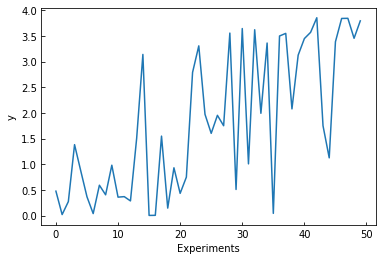

In [33]:
fig,ax = plt.subplots(1)
ax.plot(hartmann3D.data["y"])
ax.set_xlabel("Experiments")
ax.set_ylabel("y")
ax.tick_params(direction="in")
fig.savefig("hartmann_cbbo.png",dpi=300)

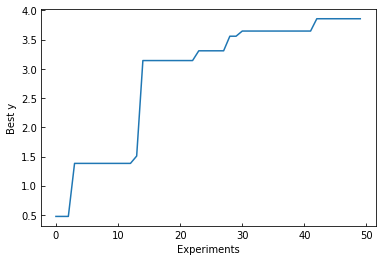

In [34]:
fig,ax = plt.subplots(1)
ax.plot(hartmann3D.data.cummax()["y"])
ax.set_xlabel("Experiments")
ax.set_ylabel("Best y")
ax.tick_params(direction="in")
fig.savefig("hartmann_cbbo_best.png",dpi=300)